<a href="https://colab.research.google.com/github/s44ths/Data-mining/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd

In [ ]:
wine_df = pd.read_excel('Wine.xlsx')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,mark
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
target = wine_df['mark']
print(target)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: mark, Length: 1599, dtype: int64


In [ ]:
wine_data = wine_df.drop(['mark'], axis = 1)
from sklearn.preprocessing import scale
data = scale(wine_data)

In [ ]:
x_axis = data[:, 4]   # chlorides
y_axis = data[:, 3]   # residual sugar
z_axis = data[:, 10]  # alcohol

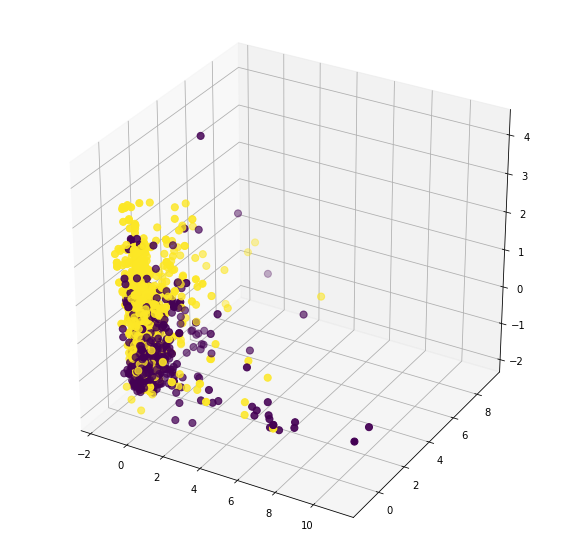

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis, z_axis, c = target, s = 50)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


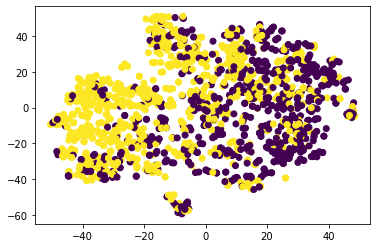

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=30)
transformed = model.fit_transform(data)

x1_axis = transformed[:, 0]
y1_axis = transformed[:, 1]

plt.scatter(x1_axis, y1_axis, c=target)
plt.show()
# В целом видно два кластера, хоть они и перекрывают друг-друга

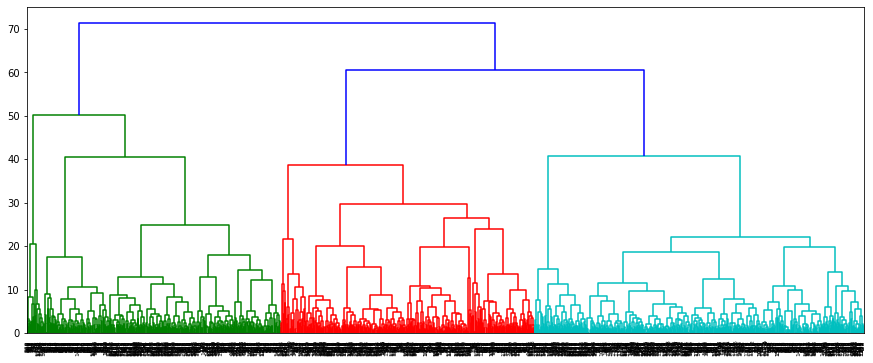

In [ ]:
fig = plt.figure(figsize = (15, 6))

from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(data,  method='ward')
dendrogram(mergings,
            leaf_rotation=90,leaf_font_size=6, color_threshold=60) 
# color_threshold - уровень, ниже которого происходит объединение в кластер
plt.show()
# В целом видно, что получается 2-4 глобальных кластера

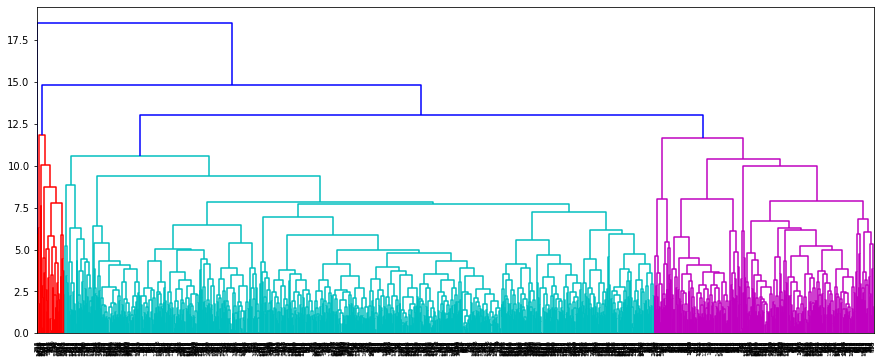

In [ ]:
# Другой метод вычисления расстояния между кластерами
fig = plt.figure(figsize = (15, 6))
mergings1 = linkage(data,  method='complete')
dendrogram(mergings1,
            leaf_rotation=90,leaf_font_size=6, color_threshold=13)
plt.show()
# Результаты немного отличаются. Но в целом алгоритм также находит 2 или 3 глобальных кластера.  

In [ ]:
# Кластеризация с помощью AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,  linkage = 'ward')
y_hc = hc.fit_predict(data)
from sklearn import metrics
metrics.silhouette_score(data, y_hc)

0.15774678821183297

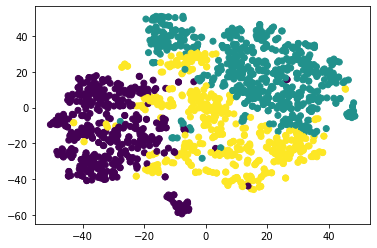

In [ ]:
plt.scatter(x1_axis, y1_axis, c=y_hc)
plt.show()
# sklearn определяет три смежных между собой кластера, это соответствует полученным ранее данным

In [ ]:
# Кластеризация методом k-средних
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [ ]:
all_predictions = model.predict(data)
all_predictions 
# Предсказания метода k-средних

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

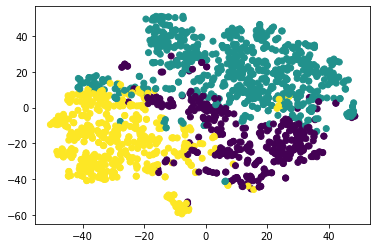

In [ ]:
plt.scatter(x1_axis, y1_axis, c=all_predictions)
plt.show()
# Также видим три смежных кластера

In [ ]:
metrics.silhouette_score(data, all_predictions, metric='euclidean') 

0.18938583423685795

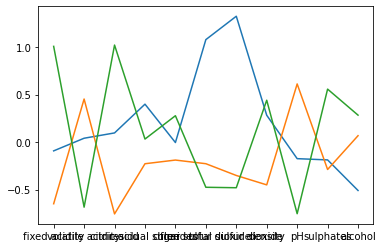

In [ ]:
# Средние значения показателей в каждом из 3 кластеров
d=model.cluster_centers_
x_l = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
plt.plot(x_l,d[0])
plt.plot(x_l,d[1])
plt.plot(x_l,d[2])

plt.show()

In [ ]:
# Прадсказание с помощью DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.8)
dbscan.fit(data)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

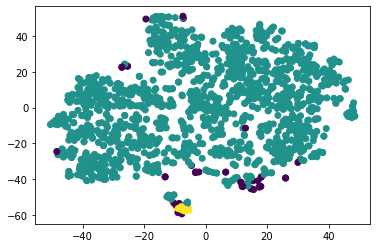

In [ ]:
# Кластеризация с помощью DBSCAN
plt.scatter(x1_axis, y1_axis, c=dbscan.labels_)
plt.show()
# Выделяется 3 кластера при заданном eps